In [753]:
'''
*****************************************************************************************************************************************
*****************************************************************************************************************************************
* Author             : Anjana Tiha
* Author Details     : Masters of Science, Computer Science, University of Memphis, Memphis, Tennessee, USA (May 2018)
*****************************************************************************************************************************************
*****************************************************************************************************************************************
* Project Name       : 
* Description        : Machine Learning (Supervised Learning/ Classification/ Predictive Algorithm) for identifying toxic comments.
* Solution           : 
* Input              : 
* Output             : 
* Start Date         : 07.04.2018
* Last Update        : 
* Tools Requirement  : Anaconda/PyCharm, Python
* Comments           : Please use Anaconda editor for visualization and convenience.
* Version History    : 1.0.0.0
* Current Version    : 1.0.0.0
*****************************************************************************************************************************************
*****************************************************************************************************************************************

'''


'\n*****************************************************************************************************************************************\n*****************************************************************************************************************************************\n* Author             : Anjana Tiha\n* Author Details     : Masters of Science, Computer Science, University of Memphis, Memphis, Tennessee, USA (May 2018)\n*****************************************************************************************************************************************\n*****************************************************************************************************************************************\n* Project Name       : \n* Description        : Machine Learning (Supervised Learning/ Classification/ Predictive Algorithm) for identifying toxic comments.\n* Solution           : \n* Input              : \n* Output             : \n* Start Date         : 07.04.2018\n* Last Update    

In [754]:
'''
Followed the following paper:
Paper Summray:
Title:    
Authors:  
'''

'\nFollowed the following paper:\nPaper Summray:\nTitle:    \nAuthors:  \n'

In [755]:
'''
*****************************************************************************************************************************************
Classify comments on categories - 
toxic, severe_toxic, obscene, threat, insult, identity_hate, any, none
*****************************************************************************************************************************************
*****************************************************************************************************************************************
Procedure:
*****************************************************************************************************************************************
1. Build pipelines for machine learning model training for reading file, creating training testing dataset, preprocessing 
   (), 
   extracting features, and training and evaluation in grid search approach for mutiple models.
2. Preprocessing unit replaced non standard input features with default value.
3. Build feature class for following features: 
    - Count of exclamations, periods, question marks, punctuation, special characters, repeated punctuation, and quotes 
      in each comment.
    
*****************************************************************************************************************************************
*****************************************************************************************************************************************

'''

'\n*****************************************************************************************************************************************\nClassify comments on categories - \ntoxic, severe_toxic, obscene, threat, insult, identity_hate, any, none\n*****************************************************************************************************************************************\n*****************************************************************************************************************************************\nProcedure:\n*****************************************************************************************************************************************\n1. Build pipelines for machine learning model training for reading file, creating training testing dataset, preprocessing \n   (), \n   extracting features, and training and evaluation in grid search approach for mutiple models.\n2. Preprocessing unit replaced non standard input features with default value.\n3. Build fe

In [756]:
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
import string
from string import punctuation
import re
from tokenize import tokenize
import nltk, re, time
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn import metrics
import gc

In [757]:
class File:
    def __init__(self, train_X_file, train_Y_file, test_X_file, test_Y_file):
        if train_X_file:
            self.train_X = pd.read_csv(train_X_file)
        if train_Y_file:
            self.train_Y = pd.read_csv(train_Y_file)
        else:
            self.train_Y = None
        if test_X_file:
            self.test_X = pd.read_csv(test_X_file)
        if test_Y_file:
            self.test_Y = pd.read_csv(test_Y_file)
        else:
            self.test_Y = None
            
    def get_content(self):
        return self.train_X, self.train_Y, self.test_X, self.test_Y

In [758]:
class Data:
    def __init__(self, train_X, train_Y, test_X, test_Y, train_test, train_XY, test_XY, targets):
        self.train_X = train_X
        self.test_X = test_X
     
        self.train_Y = None
        self.test_Y = None
        
        self.feature_cols = None
        self.targets = targets
        
        if train_XY:
            self.train_Y = self.train_X[self.targets]
            
            self.train_X.drop(columns=self.targets, inplace=True)           
        else:
            self.train_Y = train_Y
            
            
            
        if test_XY:
            print(targets)
            self.test_Y = test_X[self.targets]        
            self.test_X.drop(columns=targets, inplace=True)
        else:
            self.test_Y = test_Y
        
#         self.train_X.drop(columns='id', inplace=True)
#         self.test_X.drop(columns='id', inplace=True)

    def set_feature_cols(self, feature_cols):
        if self.feature_cols:
            self.feature_cols.append(feature_cols)
        else: self.feature_cols = feature_cols
            
    def remove_feature_cols(self, feature_cols):
        if self.feature_cols:
            self.feature_cols.remove(feature_cols)
        else: self.feature_cols = None
            
    
    def fill_columns_selected(self, columns_names, columns_val, inplace=True):
        for cols in columns_names:
            self.train_X[cols].fillna(columns_val, inplace=inpl)
            self.test_X[cols].fillna(columns_val, inplace=inpl)
            
        
    
    def get_data(self):
        return self.train_X, self.train_Y, self.test_X, self.test_Y
            
            

In [759]:
class Preprocess:
    def __init__(self):
        pass
    def clean_text(self, text, alpha=True, punc=False, case_active=False, remove_stopwords=True):
        if alpha:
            text  = re.sub(r"[^a-z]", " ", text)
        if case_active==False:
            text  = text .lower()
        if punc==False:
            text  = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            self.text = ' '.join([word for word in text.split() if word not in cached_stopwords])
        text = re.sub(r" +", " ", text)
        text = text.strip()
        text = text .split()
        return text   

    
    def tokenize(self, text, alpha=True, punc=False, case_active=False, remove_stopwords=True):
        if alpha:
            text = re.sub(r"[^a-z]", " ", text)
        if case_active==False:
            text = text.lower()
        if punc==False:
            text = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            text = ' '.join([word for word in text.split() if word not in cached_stopwords])
        text = re.sub(r" +", " ", text)
        text = text.strip()
        text = text.split()
        return text 


    def single_char_cnt(self, text, alpha=False, punc=False, remove_stopwords=True):
        if alpha:
            text = re.sub(r"[^a-z]", " ", text)
        if punc==False:
            text = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            text = ' '.join([word for word in text.split() if word not in cached_stopwords])

        text = re.sub(r" +", " ", text)
        text = text.strip()
        text = text.split()

        c=0
        for tok in text:
            if len(tok.strip())==1: c+=1
        return  c

    
    def find_urls(self, text):
        return re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', text)


    def count_modals(self, text):
        modals = ['can', 'could', 'may', 'might', 'must', 'will', 'would', 'should']

        toks = text.split(' ')

        c=0
        for tok in toks:
            if tok in modals: c+=1
        return c

    
    def non_alpha_mid(self, text, alpha=False, punc=False, remove_stopwords=True):
        text = re.sub(r" +", " ", text)
        if punc==False:
            text = ''.join([c for c in text if c not in punctuation])
        if remove_stopwords:
            cached_stopwords = stopwords.words("english")
            text = ''.join([word for word in text if word not in cached_stopwords])

        text = text.split()

        c=0
        for tok in text:
            m=0
            for ch in tok:
                if ch.isalpha()==0: m+=1
            if (m>1 and len(tok)>1) or (m>=1): c+=1
        return c
    


In [760]:
class TextFeatures:    
    def __init__(self, train_X, test_X, columns_text):
        self.train_X = train_X
        self.test_X = test_X
        self.columns_text = columns_text
        
        self.train_X_features = []
        self.test_X_features = []
        self.train_X_tfidf = None
        self.test_X_tfidf = None
        
        
    def get_features_X(self, X, features):
        count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
        prep_obj = Preprocess()
        
        features = []
        try:
            for col in self.columns_text:
                length=X[col].size
                
                i=0
                features_col = []
                for line in range(0, length):
                    counts = []
                
                    text = X[col][line]
                    
                    counts.append(text.count("!"))
                    counts.append(text.count("?"))
                    counts.append(text.count("."))
                    counts.append(count(text,set(string.punctuation)))
                    counts.append(len(re.findall('[''""]', text)))
                    
                    counts.append(prep_obj.single_char_cnt(text, alpha=False, punc=False, remove_stopwords=False))
                    
                    counts.append(len(prep_obj.find_urls(text)))
                    
                    counts.append(len(text))
                    counts.append(len(text.split()))
                    counts.append(sum(1 for c in text if c.isupper()))

                    counts.append(prep_obj.count_modals(text))
                    
                    counts.append(len(re.findall(r'[\U0001f600-\U0001f650]', text)))
                    counts.append(prep_obj.non_alpha_mid(text, alpha=False, punc=False, remove_stopwords=False))
                    
                    features_col.append(counts)
                    i+=1
#                     if i%10000==0: print(i)
                
    
                features_col = np.array(features_col, dtype='int64')
                features.append(features_col)
        except:
            print("Error:", line)
                
        return features
    
    
    def get_tfidf_features(self, tfidf, column):
        self.train_X_tfidf = tfidf.fit_transform(train[column])
        self.test_X_tfidf = tfidf.transform(test[column])
        
        return self.train_X_tfidf, self.test_X_tfidf
    
    
    def get_features(self):
        self.train_X_features = self.get_features_X(self.train_X, self.columns_text)
        self.test_X_features = self.get_features_X(self.test_X, self.columns_text)
        
        return self.train_X_features, self.test_X_features 
    

In [761]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

class PreprocessNumeric:
    def __init__(self):
        pass
    
    
    def fill_col(self, train_X, train_Y, test_X, test_Y):
        if len(train_X)>0:
            train_X.replace(-np.Inf, np.nan)
            train_X.replace(np.Inf, np.nan)
            train_X.replace(np.nan, 0)
            train_X = train_X.fillna(0)
        if len(train_Y)>0:
            train_Y.replace(-np.Inf, np.nan)
            train_Y.replace(np.Inf, np.nan)
            train_Y.replace(np.nan, 0)
            train_Y = train_Y.fillna(0)

#         if len(test_X)>0:
#             test_X.replace(-np.Inf, np.nan)
#             test_X.replace(np.Inf, np.nan)
#             test_X.replace(np.nan, 0)
#             test_X = test_X.fillna(0)
            
#         if len(test_Y)>0:
#             test_Y.replace(-np.Inf, np.nan)
#             test_Y.replace(np.Inf, np.nan)
#             test_Y.replace(np.nan, 0)
#             test_Y = test_Y.fillna(0)
         
        return train_X, train_Y, test_X, test_Y
        
        
    def drop_cols(self, train_X, test_X, ignore_cols):
        train_X.drop(columns=ignore_cols, inplace=True)
        test_X.drop(columns=ignore_cols, inplace=True)
        return train_X, test_X
    
    
    def normalize_target(self, train_Y, test_Y):
        
        normalizer_train_m = {}
        normalizer_test_m = {}
        
        for col in train_Y:
            normalizer_train = Normalizer(copy=False)
            normalizer_test = Normalizer(copy=False)
            
            
            normalizer_train.fit([train_Y[col]])
            train_Y[col] = normalizer_train.transform([train_Y[col]]).flatten().astype('float64') 
        
            if test_Y:
                normalizer_test.fit([test_Y[col]])
                test_Y[col] = normalizer_test.transform([test_Y[col]]).flatten().astype('float64') 
                
            normalizer_train_m[col] = normalizer_train
            normalizer_test_m[col] = normalizer_test

        return train_Y, test_Y, normalizer_train_m, normalizer_test_m
    
    
    
    def encoding_type(self, features, rating_score):
        dtype_grp = features.columns.to_series().groupby(features.dtypes).groups

#         for dtype in dtype_grp:
#             print(dtype_grp[dtype])


        for dtype in dtype_grp:
            if dtype=='int64' :
                for col in dtype_grp[dtype]:
                    features[col] = features[col].fillna(0.0)
                    features[col]=preprocessing.normalize([features[col]], norm='l2').flatten()
                    features[col] = features[col].astype('float64')
            elif dtype=='float64' :
                for col in dtype_grp[dtype]:
                    features[col] = features[col].fillna(0.0)
                    features[col]=preprocessing.normalize([features[col]], norm='l2').flatten()
                    features[col] = features[col].astype('float64')
            elif dtype=='object' :
                for col in dtype_grp[dtype]:
                    if col in rating_score:
                        features[col].replace(rating_score[col], regex=True, inplace=True)
                        features[col] = features[col].fillna(0.0)
                        features[col] = features[col].astype('float64')
                    else:
                        try:
                            le = preprocessing.LabelEncoder()
                            enc = preprocessing.OneHotEncoder()
                            le.fit(features[col].astype(str))
                            label_enc_feature_val = le.transform(features[col].astype(str))
                            features[col] = label_enc_feature_val.astype('float64')

        #                     enc.fit([label_enc_feature_val])  
        #                     hot_enc_feature_val = enc.transform([label_enc_feature_val])

        #                     print(hot_enc_feature_val)

        #                     features.join(hot_enc_feature_val)
        #                     features.drop(columns=col)
                        except ValueError:
                            print(col)
                            print("Oops!  That was no valid number.  Try again...")
                        
        return features


In [762]:
class NumricFeatures:    
    def __init__(self, train_X, test_X, columns_text):
        self.train_X = train_X
        self.test_X = test_X
        self.columns_text = columns_text
        
        self.train_X_features = []
        self.test_X_features = []
        self.train_X_tfidf = None
        self.test_X_tfidf = None
    
    
    def get_features(self):
        self.train_X_features = self.get_features_X(self.train_X, self.columns_text)
        self.test_X_features = self.get_features_X(self.test_X, self.columns_text)
        
        return self.train_X_features, self.test_X_features 
    

In [763]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


class Splitter:
    def __init__(self, splitter_name, n_splits, test_size, random_state):
        self.splitter = None
        if splitter_name == 'KFold':
            self.splitter = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        elif splitter_name == 'StratifiedShuffleSplit':
            self.splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
            
    def get_splitter(self):
        return self.splitter
    
    


In [896]:
# classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, RandomForestClassifier, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# regressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomTreesEmbedding, RandomForestRegressor, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ARDRegression, LinearRegression, LogisticRegression, LogisticRegressionCV, logistic_regression_path, HuberRegressor, PassiveAggressiveRegressor, RandomizedLogisticRegression, RANSACRegressor, SGDRegressor, TheilSenRegressor
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsRegressor, NearestNeighbors, RadiusNeighborsRegressor
from sklearn.neural_network import BernoulliRBM, MLPRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor


class Model:
    def __init__(self, model_type):
        if model_type == 'Classification':
            self.models = {
                "AdaBoostClassifier": AdaBoostClassifier(),
                "BernoulliNB": BernoulliNB(),
#                 "BernoulliRBM": BernoulliRBM(),
                "DecisionTreeClassifier": DecisionTreeClassifier(),
                "ExtraTreesClassifier": ExtraTreesClassifier(),
#                 "GaussianMixture": GaussianMixture(),
#                 "GaussianNB": GaussianNB(),
#                 "GaussianProcessClassifier": GaussianProcessClassifier(),
                "GradientBoostingClassifier": GradientBoostingClassifier(),
#                 "KDTree": KDTree(),
#                 "KNeighborsClassifier": KNeighborsClassifier(3),
                "LogisticRegression": LogisticRegression(),
                "LinearSVC": LinearSVC(),
                "MLPClassifier": MLPClassifier(),
                "MultinomialNB": MultinomialNB(),
#                 "NearestNeighbors": NearestNeighbors(),
#                 "NuSVC": NuSVC(),
                "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
                "RandomForestClassifier": RandomForestClassifier(),
#                 "SVC Linear": SVC(kernel="linear", C=0.025),
#                 "SVC radial": SVC(kernel="radial", C=0.025),
#                 "SVC": SVC(),
#                 "SVC Gamma": SVC(gamma=2, C=1)
#                 VotingClassifier: VotingClassifier(),
            }
        elif model_type == 'Regression':
            self.models  = {
                "AdaBoostRegressor": AdaBoostRegressor(),
#                 "ARDRegression": ARDRegression(),
                "BaggingRegressor": BaggingRegressor(),
#                 "BernoulliRBM": BernoulliRBM(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "ExtraTreesRegressor": ExtraTreesRegressor(),
                "ExtraTreeRegressor": ExtraTreeRegressor(),
#                 "GaussianMixture": GaussianMixture(),
#                 "GaussianNB": GaussianNB(),
                "GaussianProcessRegressor": GaussianProcessRegressor(),
                "GradientBoostingRegressor": GradientBoostingRegressor(),
                "HuberRegressor": HuberRegressor(),
#                 "IsotonicRegression": IsotonicRegression(),
#                 "KernelRidge": KernelRidge(),
#                 "KDTree": KDTree(),
#                 "KNeighborsRegressor": KNeighborsRegressor(),
#                 "LinearRegression": LinearRegression(), 
#                 "LogisticRegression": LogisticRegression(),
#                 "LogisticRegressionCV": LogisticRegressionCV(),
#                 "logistic_regression_path": logistic_regression_path(),
                "LinearSVR": LinearSVR(),
                "MLPRegressor": MLPRegressor(),
#                 "MultinomialNB": MultinomialNB(),
                "NuSVR": NuSVR(),
                "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
#                 "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
#                 "RadiusNeighborsRegressor": RadiusNeighborsRegressor(),
                "RandomForestRegressor": RandomForestRegressor(),
#                 "RandomizedLogisticRegression": RandomizedLogisticRegression(),
#                 "RANSACRegressor": RANSACRegressor(),
#                 "SGDRegressor": SGDRegressor(),
                "SVR": SVR(),
                "TheilSenRegressor": TheilSenRegressor(),
            }
    
    def get_models(self):
        return self.models
            


In [897]:
from sklearn import metrics

class ModelClassification:
    def __init__(self, train_X, train_Y, test_X, test_Y, targets, splitter, models, average, report, details):
        
        self.train_X = train_X
        self.train_Y = train_Y
        
        self.test_X = test_X
        self.test_Y = test_Y
        
        self.targets = targets
        
        self.splitter = splitter
        
        self.models = models
        
        self.average = average
        
        self.report = report
        self.details = details
        
        self.accuracy = 0
        self.f1 = 0
        self.precision = 0
        self.recall = 0
    
    
    def reset_score(self):
        self.accuracy = 0
        self.f1 = 0
        self.precision = 0
        self.recall = 0
            
    def model_evaluation(self, model, target):
        self.reset_score()
 
        if self.report:
            print("Model Description:")
            print(model)
            print("-"*100,"\n")
            
        train_Y = np.array(self.train_Y[target], dtype='int64')
        test_Y = np.array(self.test_Y[target], dtype='int64')
        
        if self.splitter:
            i=0
            for train_index, test_index in self.splitter.split(self.train_X, train_Y):
                X_train, X_test = self.train_X[train_index], self.train_X[test_index]
                y_train, y_test = train_Y[train_index], train_Y[test_index]
                model.fit(X_train, y_train)
                
                if len(self.test_X)>0:
                    predict = model.predict(self.test_X)
                    accuracy_temp = metrics.accuracy_score(test_Y, predict)
                    precision_temp = metrics.precision_score(test_Y, predict, average=self.average)
                    recall_temp = metrics.recall_score(test_Y, predict, average=self.average)
                    f1_temp = metrics.f1_score(test_Y, predict, average=self.average)
                    hamming_loss = metrics.hamming_loss(test_Y, predict)
                else:
                    predict = model.predict(X_test)
                    accuracy_temp = metrics.accuracy_score(y_test, predict)
                    precision_temp = metrics.precision_score(y_test, predict, average=self.average)
                    recall_temp = metrics.recall_score(y_test, predict, average=self.average)
                    f1_temp = metrics.f1_score(y_test, predict, average=self.average)
                    hamming_loss = metrics.hamming_loss(y_test, predict)

                self.accuracy = self.accuracy + accuracy_temp
                self.precision = self.precision + precision_temp
                self.recall = self.recall+ recall_temp
                self.f1= self.f1 + f1_temp

                
                if details:
                    print("*"*25,  " ITERATION - ", i+1, "*"*25)
                    print("-"*35)
                    print('%50s%s' % ("Accuracy Score :", accuracy_temp))
                    print('%50s%s' % ("Precision Score :", precision_temp))
                    print('%50s%s' % ("Recall Score :", recall_temp))
                    print('%50s%s' % ("F1 Score :", f1_temp))
                    print('%50s%s' % ("Hamming Loss :", hamming_loss))
                    if test_X:
#                         precision, recall, thresholds = metrics.precision_recall_curve(test_Y, predict)
#                         print('%50s%s' % ("average_precision_score :", metrics.average_precision_score(test_Y, predict, average=self.average)))
#                         print('%50s%s' % ("fbeta_score :", metrics.fbeta_score(test_Y, predict)))
#                         print('%50s%s' % ("roc_auc_score :", metrics.roc_auc_score(test_Y, predict, average=self.average)))
                        print("-"*35)
                        print(metrics.classification_report(test_Y, predict))
                        print("-"*35)
                        print("Confusion Matrix:\n\n", metrics.confusion_matrix(test_Y, predict))

                    else:
#                         precision, recall, thresholds = metrics.precision_recall_curve(y_test, predict)
                        print('%50s%s' % ("Average Precision Score :", metrics.average_precision_score(y_test, predict, average=self.average)))
                        print('%50s%s' % ("Fbeta Score :", metrics.fbeta_score(y_test, predict)))
                        print('%50s%s' % ("Roc Auc Score :", metrics.roc_auc_score(y_test, predict, average=self.average)))
                        print("-"*35)
                        print(metrics.classification_report(y_test, predict))
                        print("-"*35)
                        print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predict))
                    print("-"*35)
                    print("\n")

                i+=1

            split_num = self.splitter.get_n_splits()

            self.accuracy = self.accuracy/split_num
            self.precision = self.precision/split_num
            self.recall = self.recall/split_num
            self.f1 = self.f1/split_num

            
        else:
            model.fit(self.train_X, self.train_Y)
            predict = model.predict(self.test_X)
            
            self.accuracy = metrics.accuracy_score(test_Y, predict)
            self.precision = metrics.precision_score(test_Y, predict, average=self.average)
            self.recall = metrics.recall_score(test_Y, predict, average=self.average)
            self.f1 = metrics.f1_score(test_Y, predict, average=self.average)
            hamming_loss = metrics.hamming_loss(test_Y, predict)

            

        if self.report:
            if self.splitter:
                print("*"*50, " Average For", i+1, " Folds", "*"*50)
        
            print('%50s%s' % ("Average Accuracy Score: ", self.accuracy))
            print('%50s%s' % ("Average Precision Score: ", self.precision))
            print('%50s%s' % ("Average Recall Score: ", self.recall))
            print('%50s%s' % ("Average F1 Score: ", self.f1))


        return self.accuracy, self.precision, self.recall, self.f1
    
    def grid(self, target):
        print("Spliter Description:")
        print(self.splitter)
        print("targets: ", target, "\n\n")
        
        evaluation = {}
        
        if self.models==None:
            models_names_obj = Model("Classification")
            self.models = models_names_obj.get_models()
            
        for model in self.models:
            evaluation_temp = []
            accuracy, precision, recall, f1 = self.model_evaluation(self.models[model], target)
            evaluation_temp.append(accuracy)
            evaluation_temp.append(precision)
            evaluation_temp.append(recall)
            evaluation_temp.append(f1)

            evaluation[model] = evaluation_temp

            gc.collect()

        rows_list = []

        for name in evaluation:
            rows_list.append([name]+evaluation[name])

        evaluation_pd = pd.DataFrame(rows_list, columns=['model', 'accuracy', 'precision', 'recall', 'f1']) 
        
        return evaluation_pd
    
    def multi_target(self):
        evaluations_dict = {}
        for target in self.targets:
            evaluations_dict[target] = self.grid(target)
        
        return evaluations_dict

In [898]:
class ModelRegression:
    def __init__(self, train_X, train_Y, test_X, test_Y, targets, splitter, models, average, report, details):
        self.train_X = train_X
        self.train_Y = train_Y
        
        self.test_X = test_X
        self.test_Y = test_Y
        
        self.targets = targets

        self.splitter = splitter
        self.models = models
        self.trained_models = None
        
        self.average = average
        self.report = report
        self.details = details
        
        self.explained_variance_score_val = 0
        self.mean_absolute_error_val = 0
        self.mean_squared_error_val = 0
        self.mean_squared_log_error_val = 0
        self.median_absolute_error_val = 0
        self.r2_score_val = 0
    
    def reset_score(self):
        self.explained_variance_score_val = 0
        self.mean_absolute_error_val = 0
        self.mean_squared_error_val = 0
        self.mean_squared_log_error_val = 0
        self.median_absolute_error_val = 0
        self.r2_score_val = 0
        
            
    def model_evaluation(self, model, target):
        self.reset_score()
        if report:
            print("Model Description:")
            print(model)
            print("-"*100,"\n")

        if splitter:
            i=0
            train_Y = np.array(self.train_Y[target], dtype='int64')

            
            for train_index, test_index in self.splitter.split(self.train_X, train_Y):
                X_train, X_test = self.train_X[train_index], self.train_X[test_index]
                y_train, y_test = train_Y[train_index], train_Y[test_index]
                model.fit(X_train, y_train)
                
                if test_X:
                    predict = model.predict(test_X)
                    explained_variance_score_temp = metrics.explained_variance_score(test_Y, predict)
                    mean_absolute_error_temp = metrics.mean_absolute_error(test_Y, predict)
                    mean_squared_error_temp = metrics.mean_squared_error(test_Y, predict)
                    mean_squared_log_error_temp = metrics.mean_squared_log_error(test_Y, predict)
                    median_absolute_error_temp = metrics.median_absolute_error(test_Y, predict)
                    r2_score_temp = metrics.r2_score(test_Y, predict)
                else:
                    predict = model.predict(X_test)
                    explained_variance_score_temp = metrics.explained_variance_score(y_test, predict)
                    mean_absolute_error_temp = metrics.mean_absolute_error(y_test, predict)
                    mean_squared_error_temp = metrics.mean_squared_error(y_test, predict)
                    mean_squared_log_error_temp = metrics.mean_squared_log_error(y_test, predict)
                    median_absolute_error_temp = metrics.median_absolute_error(y_test, predict)
                    r2_score_temp = metrics.r2_score(y_test, predict)


                self.explained_variance_score_val = self.explained_variance_score_val + explained_variance_score_temp
                self.mean_absolute_error_val = self.mean_absolute_error_val + mean_absolute_error_temp
                self.mean_squared_error_val = self.mean_squared_error_val + mean_squared_error_temp
                self.mean_squared_log_error_val = self.mean_squared_log_error_val + mean_squared_log_error_temp
                self.median_absolute_error_val = self.median_absolute_error_val + median_absolute_error_temp
                self.r2_score_val = self.r2_score_val + r2_score_temp

                if details:
                    print("*"*25,  " ITERATION - ", i+1, "*"*25)
                    print("-"*35)
                    print('%50s%s' % ("explained_variance_score_temp :", explained_variance_score_temp))
                    print('%50s%s' % ("mean_absolute_error_temp :", mean_absolute_error_temp))
                    print('%50s%s' % ("mean_squared_error_temp :", mean_squared_error_temp))
                    print('%50s%s' % ("median_absolute_error_temp :", median_absolute_error_temp))
                    print('%50s%s' % ("mean_squared_log_error_temp :", mean_squared_log_error_temp))
                    print('%50s%s' % ("median_absolute_error_temp :", median_absolute_error_temp))
                    print('%50s%s' % ("r2_score_val :", r2_score_val))
                    print("-"*35)
                    print("\n")
                i+=1

            split_num = splitter.get_n_splits()

            self.explained_variance_score_val = self.explained_variance_score_val/split_num
            self.mean_absolute_error_val = self.mean_absolute_error_val/split_num
            self.mean_squared_error_val = self.mean_squared_error_val/split_num
            self.median_absolute_error_val = self.median_absolute_error_val/split_num
            self.r2_score_val = self.r2_score_val/split_num

        else:
            model.fit(train_X, train_Y)
            predict = model.predict(test_X)

            self.explained_variance_score = metrics.explained_variance_score(test_Y, predict)
            self.mean_absolute_error = metrics.mean_absolute_error(test_Y, predict)
            self.mean_squared_error = metrics.mean_squared_error(test_Y, predict)
            self.mean_squared_log_error = metrics.mean_squared_log_error(test_Y, predict)
            self.median_absolute_error = metrics.median_absolute_error(test_Y, predict)
            self.r2_score_temp = metrics.r2_score(test_Y, predict)

        if report:
            if splitter:
                print("*"*40, " Average For", i+1, " Folds", "*"*40)

            print('%50s%s' % ("Average explained_variance_score: ", self.explained_variance_score_val))
            print('%50s%s' % ("Average mean_absolute_error: ", self.mean_absolute_error_val))
            print('%50s%s' % ("Average mean_squared_error: ", self.mean_squared_error_val))
            print('%50s%s' % ("Average mean_squared_log_error: ", self.mean_squared_log_error_val))
            print('%50s%s' % ("Average median_absolute_error: ", self.median_absolute_error_val))
            print('%50s%s' % ("Average r2_score: ", self.r2_score_val))
            print("\n")
            print("*"*100)

        return model, self.explained_variance_score_val, self.mean_absolute_error_val, self.mean_squared_error_val, self.mean_squared_log_error_val, self.median_absolute_error_val, self.r2_score_val

    def grid(self, target):
        print("Spliter Description:")
        print(self.splitter)
        print("targets: ", target, "\n\n")
        
        trained_models = {}
        evaluation = {}
        
        if self.models==None:
            models_names_obj = Model("Regression")
            self.models = models_names_obj.get_models()
            
        for model in self.models:
            evaluation_temp = []
            model_new, explained_variance_score_val, mean_absolute_error_val, mean_squared_error_val, mean_squared_log_error_val, median_absolute_error_val, r2_score_val = self.model_evaluation(self.models[model], target)
            evaluation_temp.append(explained_variance_score_val)
            evaluation_temp.append(mean_absolute_error_val)
            evaluation_temp.append(mean_squared_error_val)
            evaluation_temp.append(mean_squared_log_error_val)
            evaluation_temp.append(median_absolute_error_val)            
            evaluation_temp.append(r2_score_val)

            evaluation[model] = evaluation_temp
            trained_models[model] = model_new
            
            

#             gc.collect()

        rows_list = []

        for name in evaluation:
            
            rows_list.append([name]+evaluation[name])

        evaluation_pd = pd.DataFrame(rows_list, columns=['model', 'explained_variance_score', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'r2_score']) 

        return trained_models, evaluation_pd
    
    def multi_target(self):
        trained_models_multi_target = {}
        evaluations_dict = {}
        for target in self.targets:
            trained_models, evaluations_dict[target] = self.grid(target)
            trained_models_multi_target[target] = trained_models
        
        return trained_models_multi_target, evaluations_dict

In [899]:
train_X_file = r'house-prices-advanced-regression-techniques/train.csv'
test_X_file = r'house-prices-advanced-regression-techniques/test.csv'

file_obj = File(train_X_file, None, test_X_file, None)


train_X, train_Y, test_X, test_Y = file_obj.get_content()



###

targets = ['SalePrice']


data_obj = Data(train_X, None, test_X, None, False, True, False, targets)


train_X, train_Y, test_X, test_Y = data_obj.get_data()

###

ignore_cols = ['BsmtExposure']
val1 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
val2 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}

rating_score = {'ExterQual':val1, 'ExterCond':val1, 'BsmtQual':val1, 'BsmtCond':val1, 'HeatingQC':val1, 'KitchenQual':val1, 'FireplaceQu':val1, 'GarageQual':val1, 'GarageCond':val1, 'PoolQC':val1, 'BsmtFinType1':val2, 'BsmtFinType2':val2}


#

prep_num = PreprocessNumeric()

train_X, test_X = prep_num.drop_cols(train_X, test_X, ignore_cols)

train_X = prep_num.encoding_type(train_X, rating_score)



test_X = prep_num.encoding_type(test_X, rating_score)



#

# print(train_X) 
train_X, train_Y, test_X, test_Y = prep_num.fill_col(train_X, train_Y, None, None)

train_Y, test_Y, normalizer_train, normalizer_test = prep_num.normalize_target(train_Y, None)


# train_Y[targets[0]] = train_Y_temp
#
train_X = train_X.values

norm = train_Y.max()[0].flatten()[0]

train_Y = train_Y/norm

# train_Y[targets[0]] = train_Y[targets[0]]/norm


# train_Y = train_Y.values

# if test_X:
#     test_X = test_X.values
# if test_Y:
#     test_Y = test_Y.values

# train_Y, test_Y, normalizer_train, normalizer_test = prep_num.normalize(None, train_Y, None, test_Y)


# splitter_name = "StratifiedShuffleSplit"
splitter_name = "KFold"
n_splits = 5
test_size = 0.25
random_state = True

splitter_obj = Splitter(splitter_name, n_splits, test_size, random_state)
splitter = splitter_obj.get_splitter()


#


models = None

average = "weighted"
report = 1
details = 0

m = ModelRegression(train_X, train_Y, None, None, targets, splitter, models, average, report, details)

trained_models, evaluation_pd = m.grid(targets[0])

evaluation = evaluation_pd



Spliter Description:
KFold(n_splits=5, random_state=True, shuffle=True)
targets:  SalePrice 


Model Description:
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
---------------------------------------------------------------------------------------------------- 

****************************************  Average For 6  Folds ****************************************
                Average explained_variance_score: 0.8
                     Average mean_absolute_error: 0.0006849315068493151
                      Average mean_squared_error: 0.0006849315068493151
                  Average mean_squared_log_error: 0.001645387033966443
                   Average median_absolute_error: 0.0
                                Average r2_score: 0.7993127147766323


****************************************************************************************************
Model Description:
BaggingRegressor(base_estimator=None, bootstrap

****************************************  Average For 6  Folds ****************************************
                Average explained_variance_score: 0.0
                     Average mean_absolute_error: 0.002246761494540448
                      Average mean_squared_error: 0.0006907968525776663
                  Average mean_squared_log_error: 0.001674620542437165
                   Average median_absolute_error: 0.0011694348152674497
                                Average r2_score: -0.0006872852233676952


****************************************************************************************************
Model Description:
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0

/home/anjanatiha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


****************************************  Average For 6  Folds ****************************************
                Average explained_variance_score: 0.0
                     Average mean_absolute_error: 0.000685172631517468
                      Average mean_squared_error: 0.0006849315161411483
                  Average mean_squared_log_error: 0.0016453870804233727
                   Average median_absolute_error: 4.661868889740113e-10
                                Average r2_score: -0.0006872852233676952


****************************************************************************************************


In [908]:
evaluation = evaluation_pd
evaluation

,model,explained_variance_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score
0,AdaBoostRegressor,0.800000,0.000685,0.000685,0.001645,0.000000e+00,0.799313
1,BaggingRegressor,0.000000,0.002397,0.001459,0.004214,0.000000e+00,-0.000687
2,DecisionTreeRegressor,0.600000,0.002740,0.002740,0.006582,0.000000e+00,0.599313
3,ExtraTreesRegressor,0.200000,0.001233,0.000767,0.001998,0.000000e+00,0.199313
4,ExtraTreeRegressor,0.400000,0.003425,0.003425,0.008227,0.000000e+00,0.399313
5,GaussianProcessRegressor,0.000000,0.000685,0.000685,0.001645,6.139614e-34,-0.000687
6,GradientBoostingRegressor,0.400000,0.002832,0.002712,0.006577,7.380318e-06,-0.000687
7,HuberRegressor,0.000000,0.001380,0.000706,0.001748,1.202273e-04,-0.000687
8,LinearSVR,0.000000,0.002247,0.000691,0.001675,1.169435e-03,-0.000687
9,MLPRegressor,-1.065353,0.096287,0.018191,0.097675,7.162724e-02,-1.227047


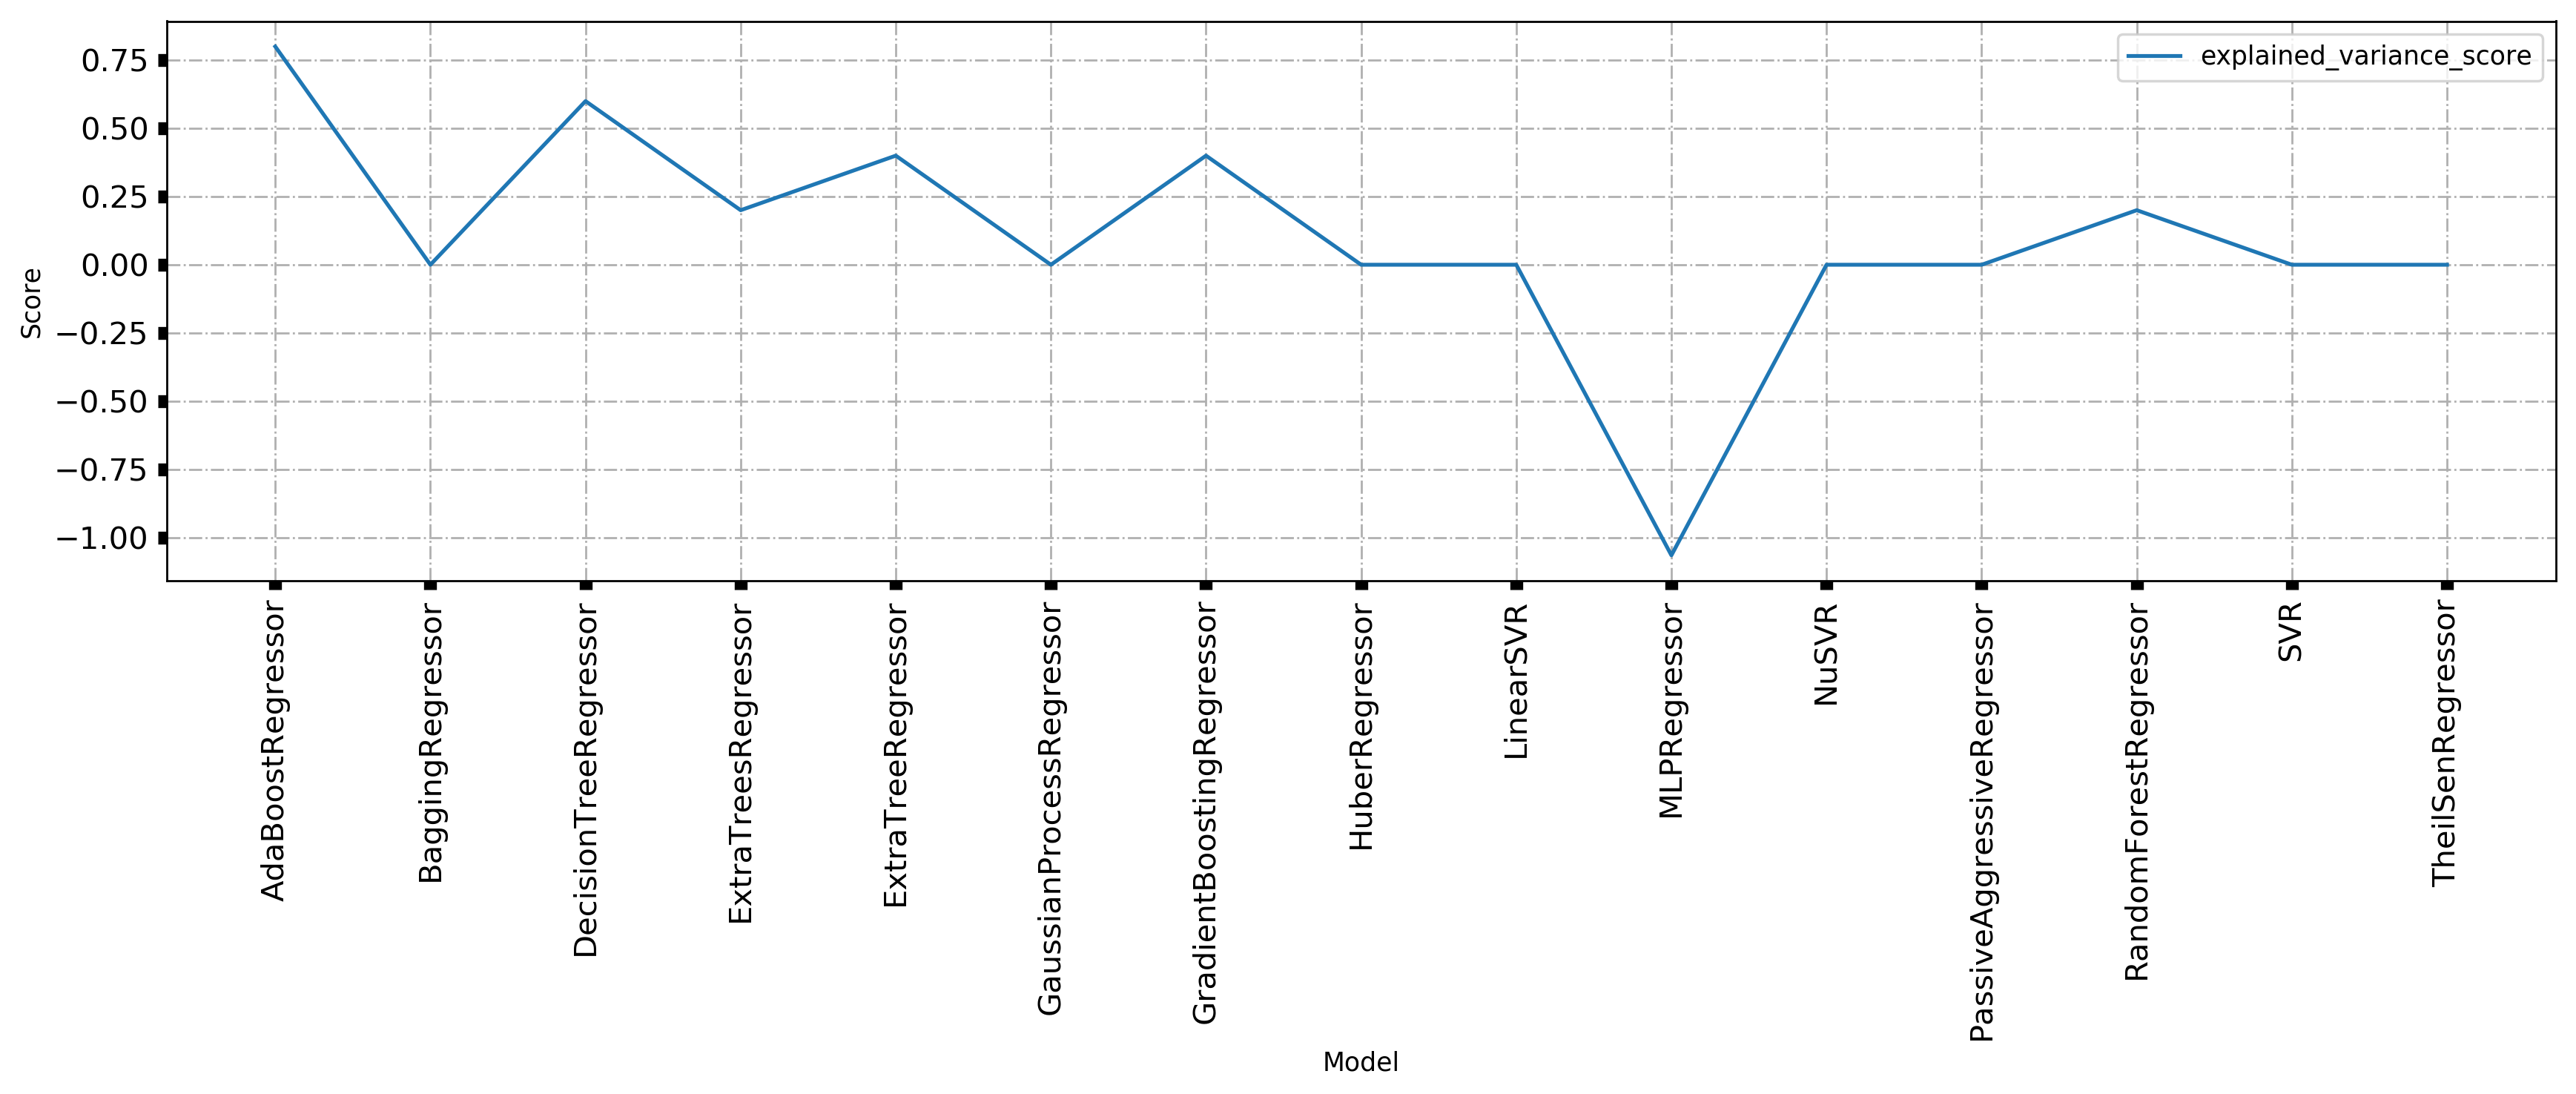

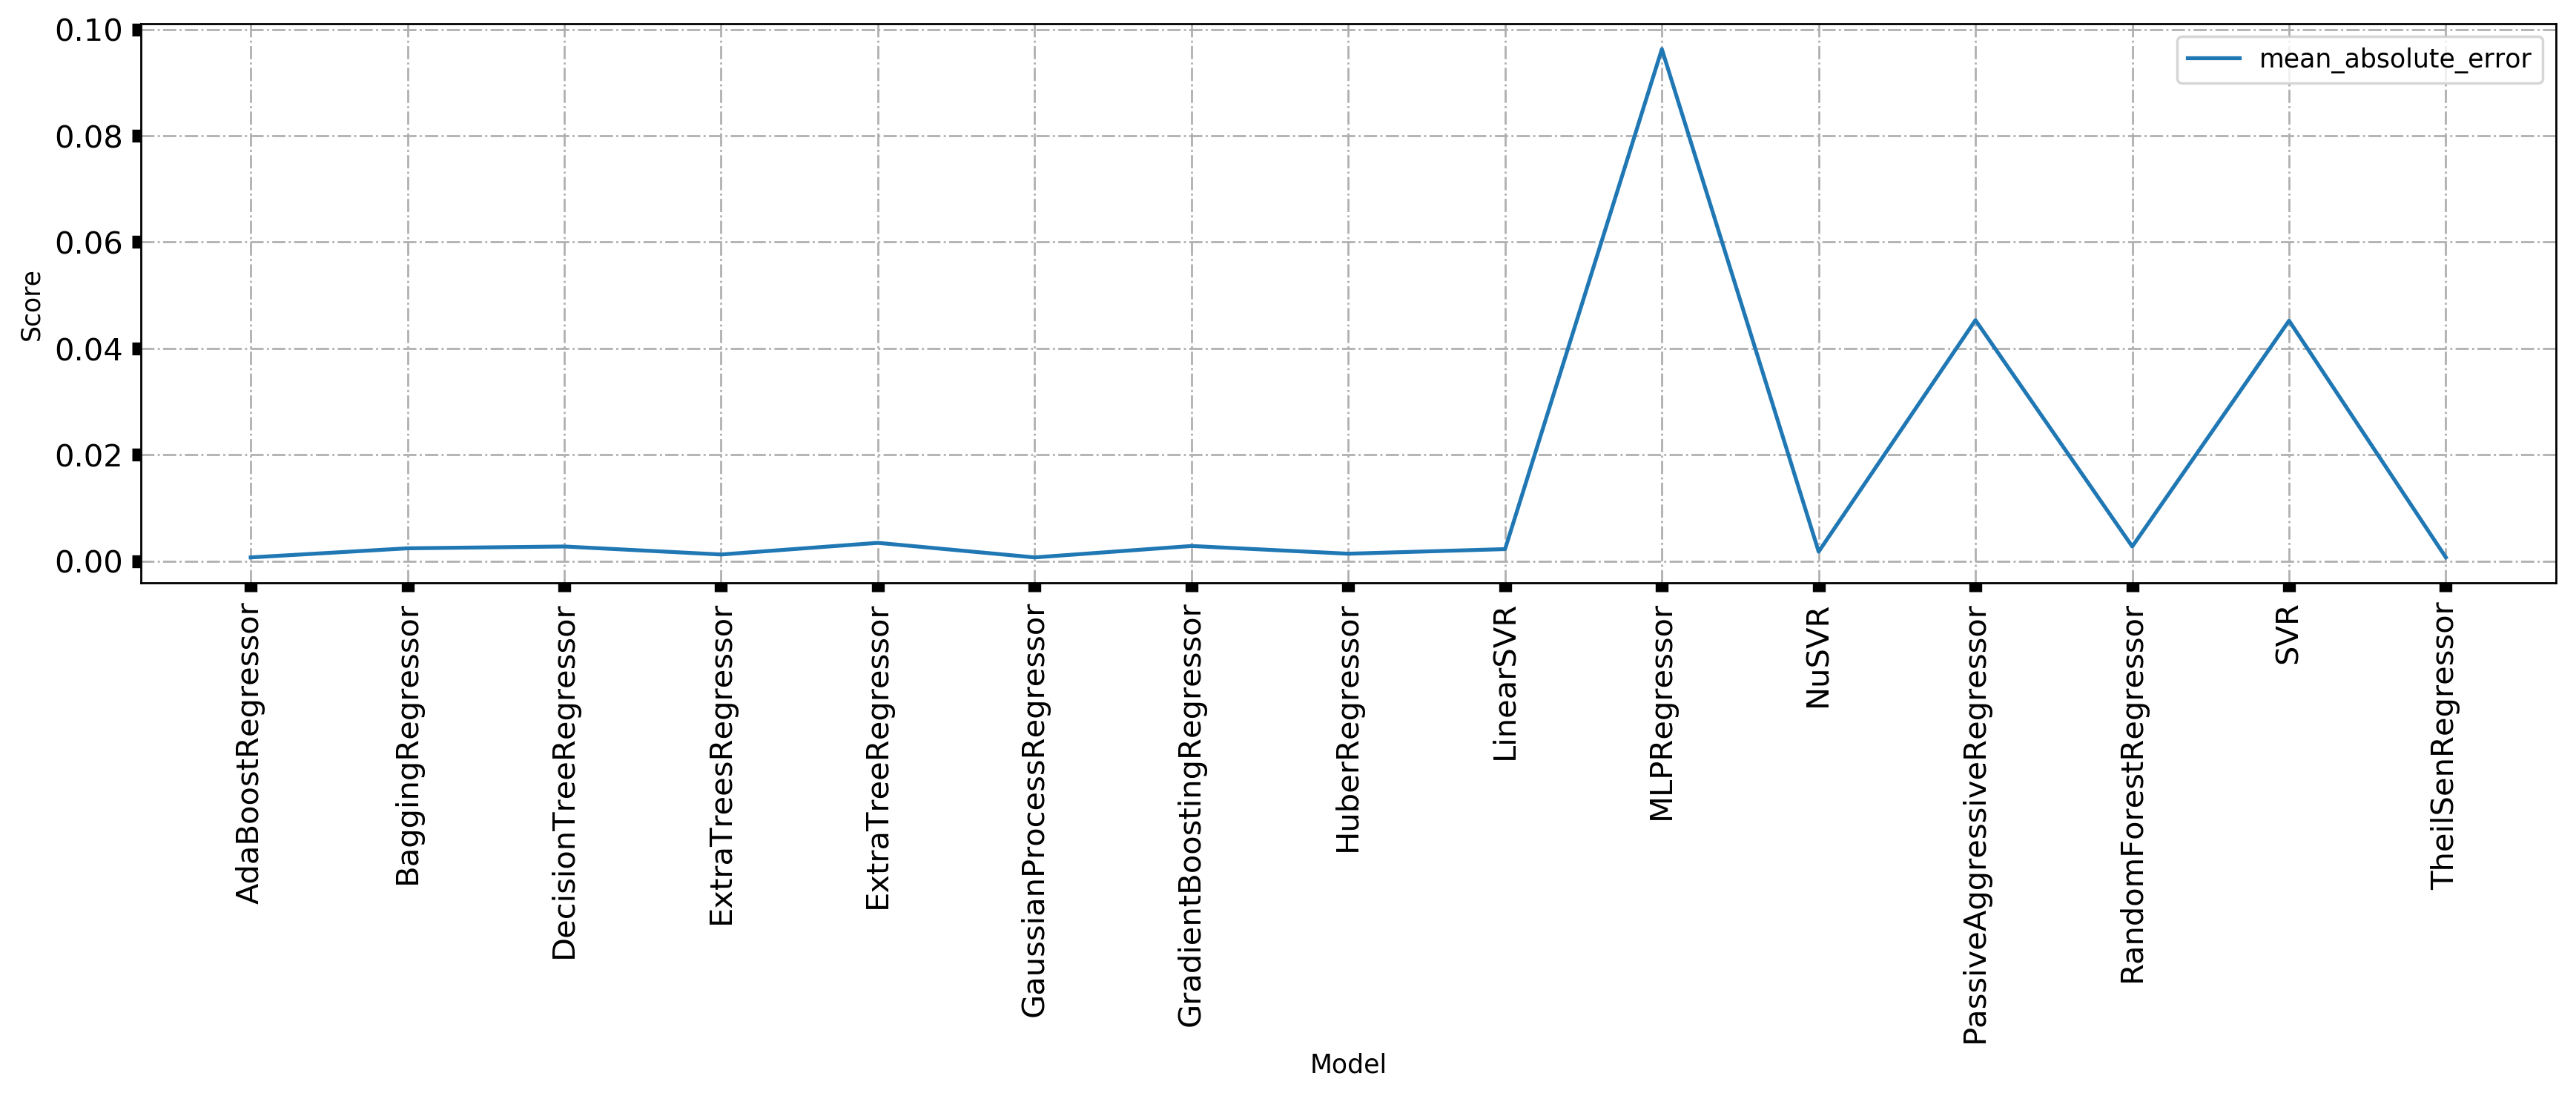

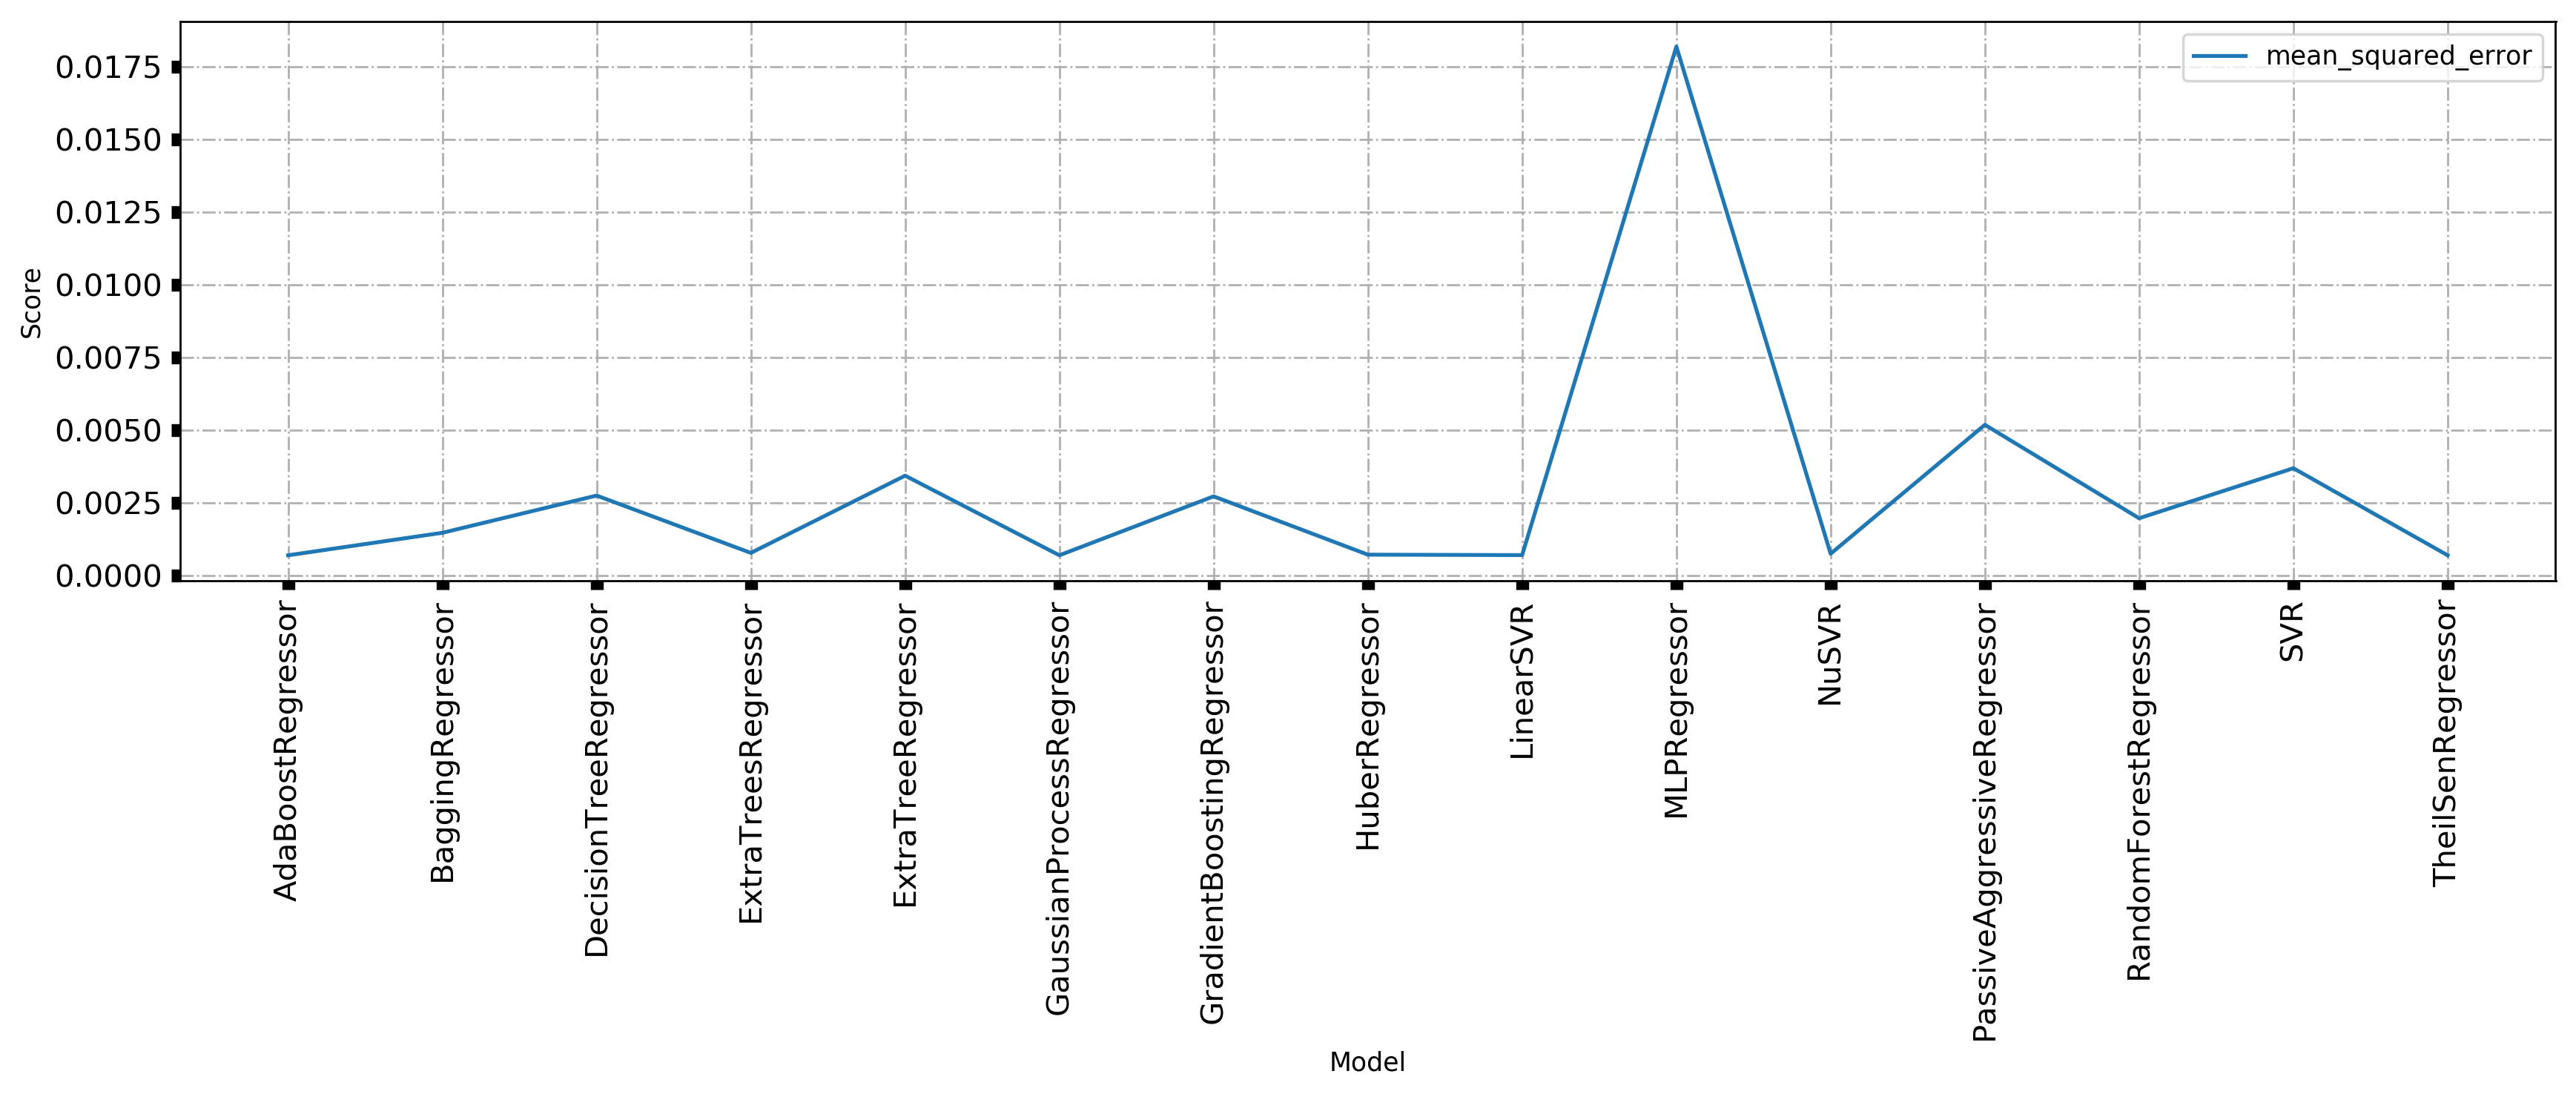

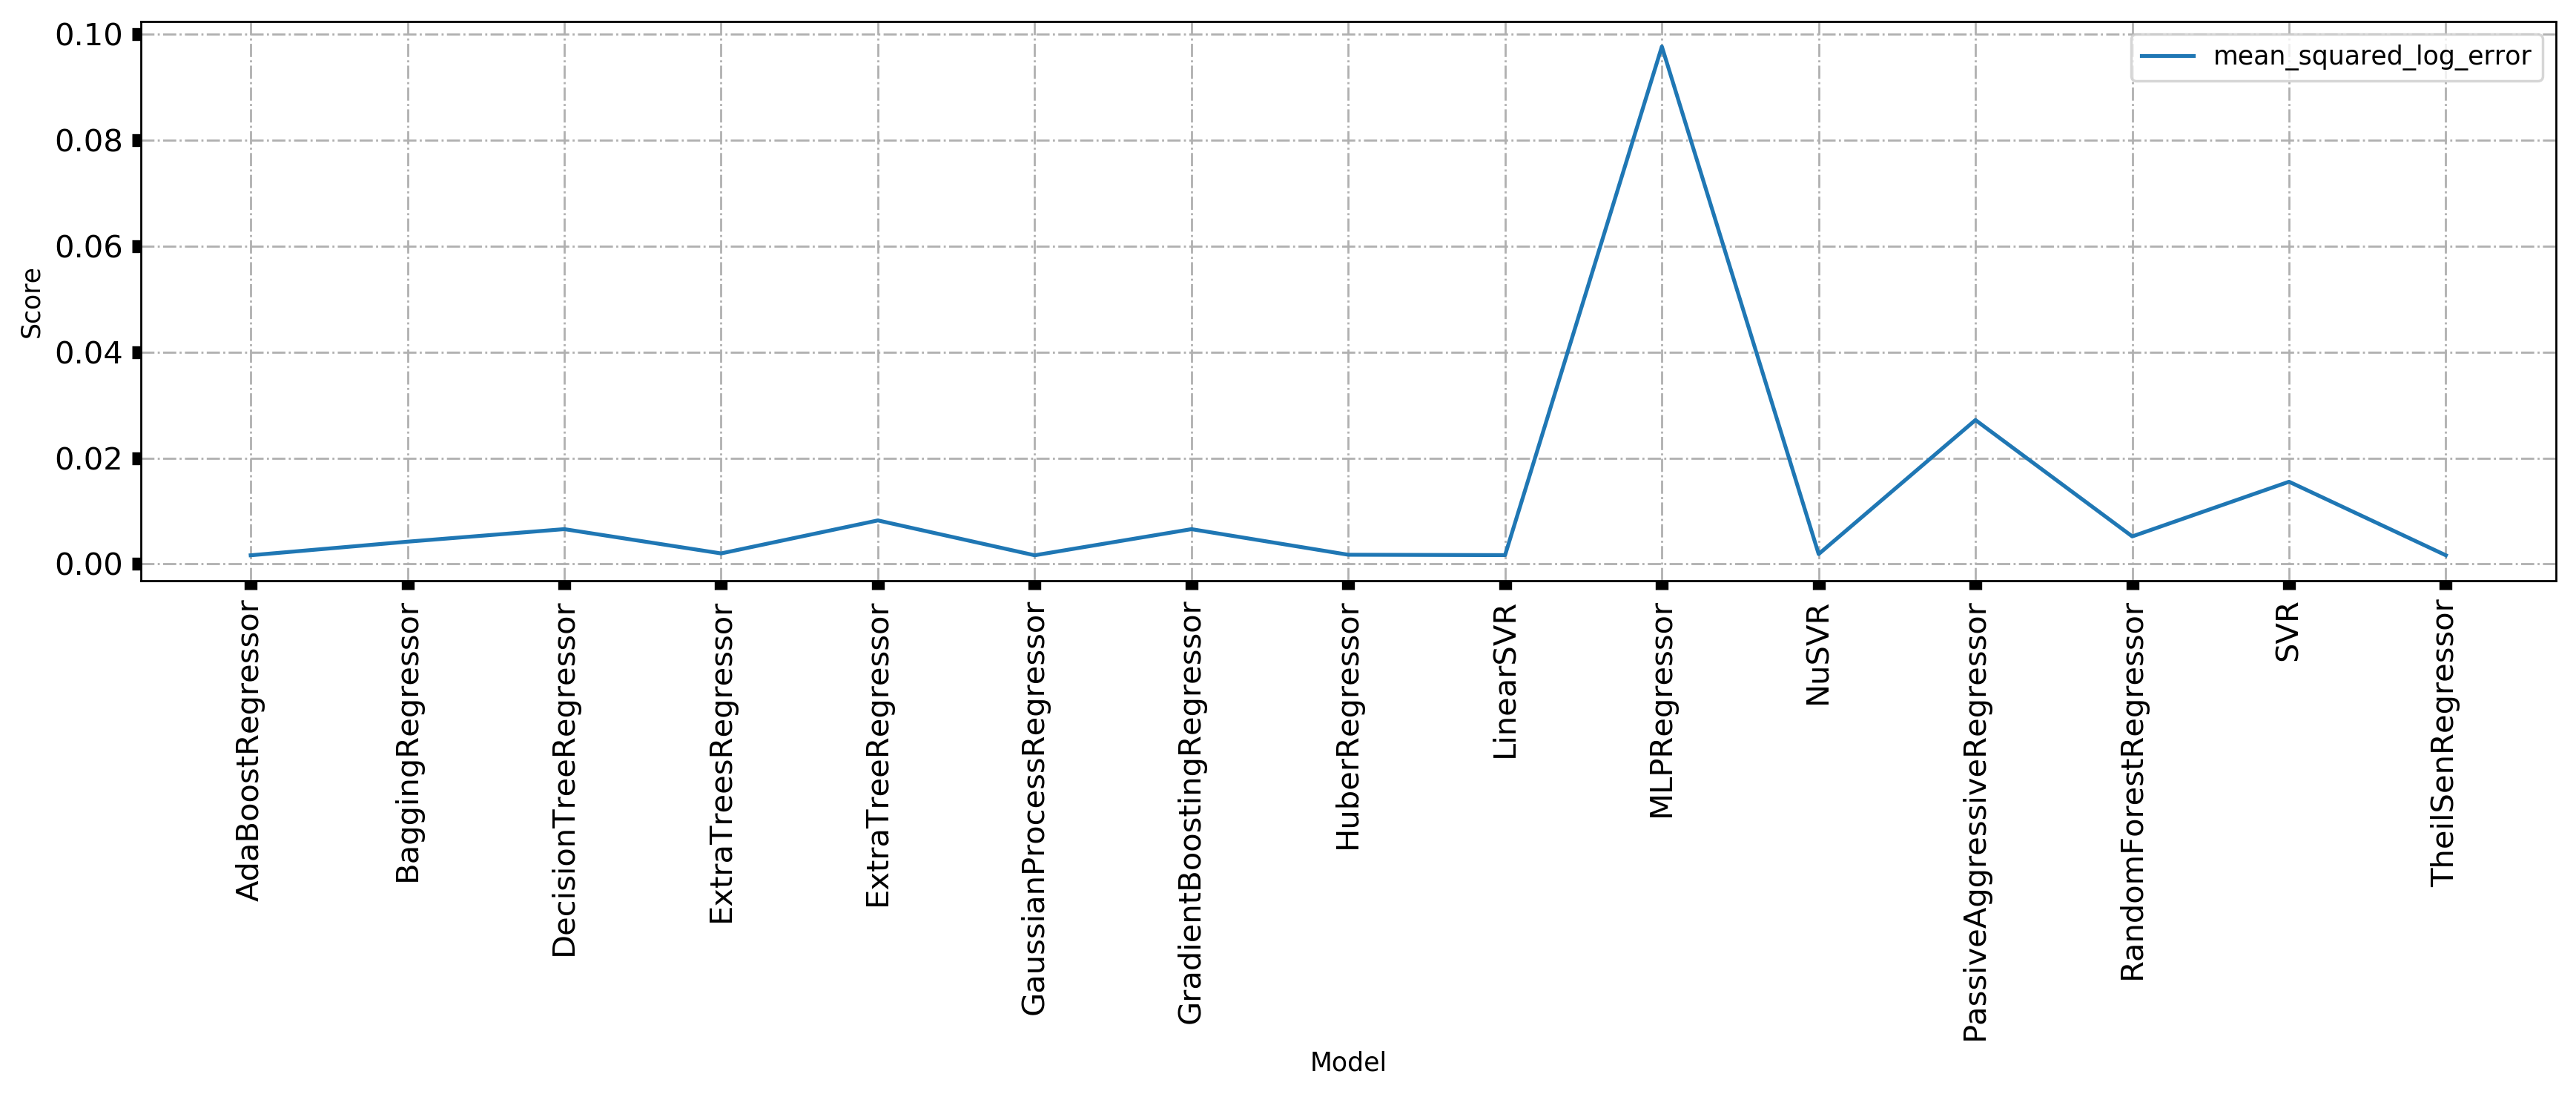

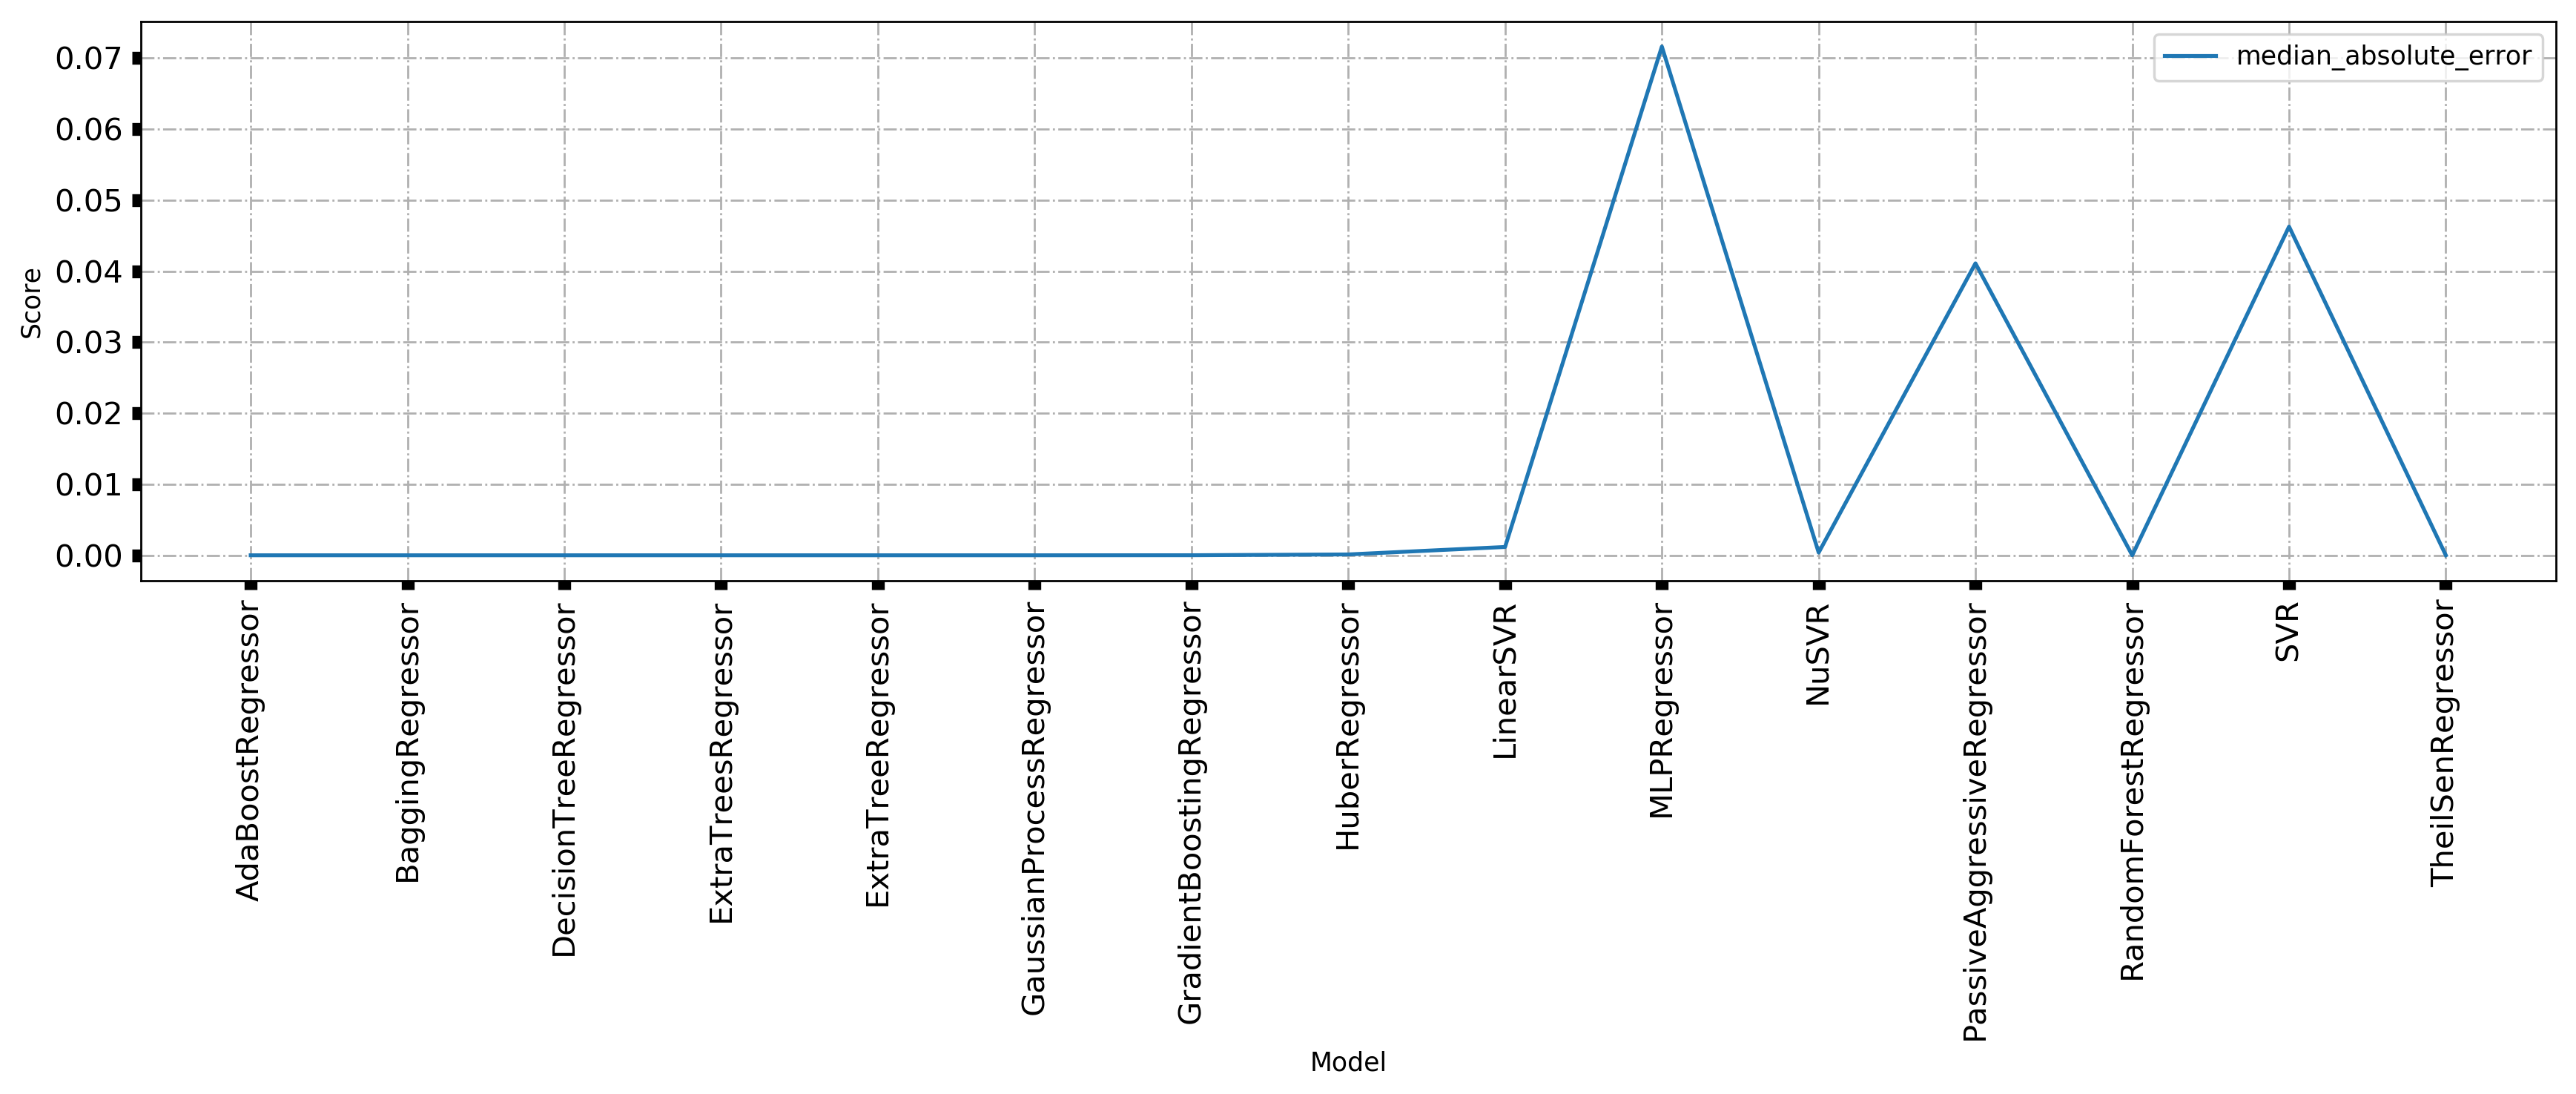

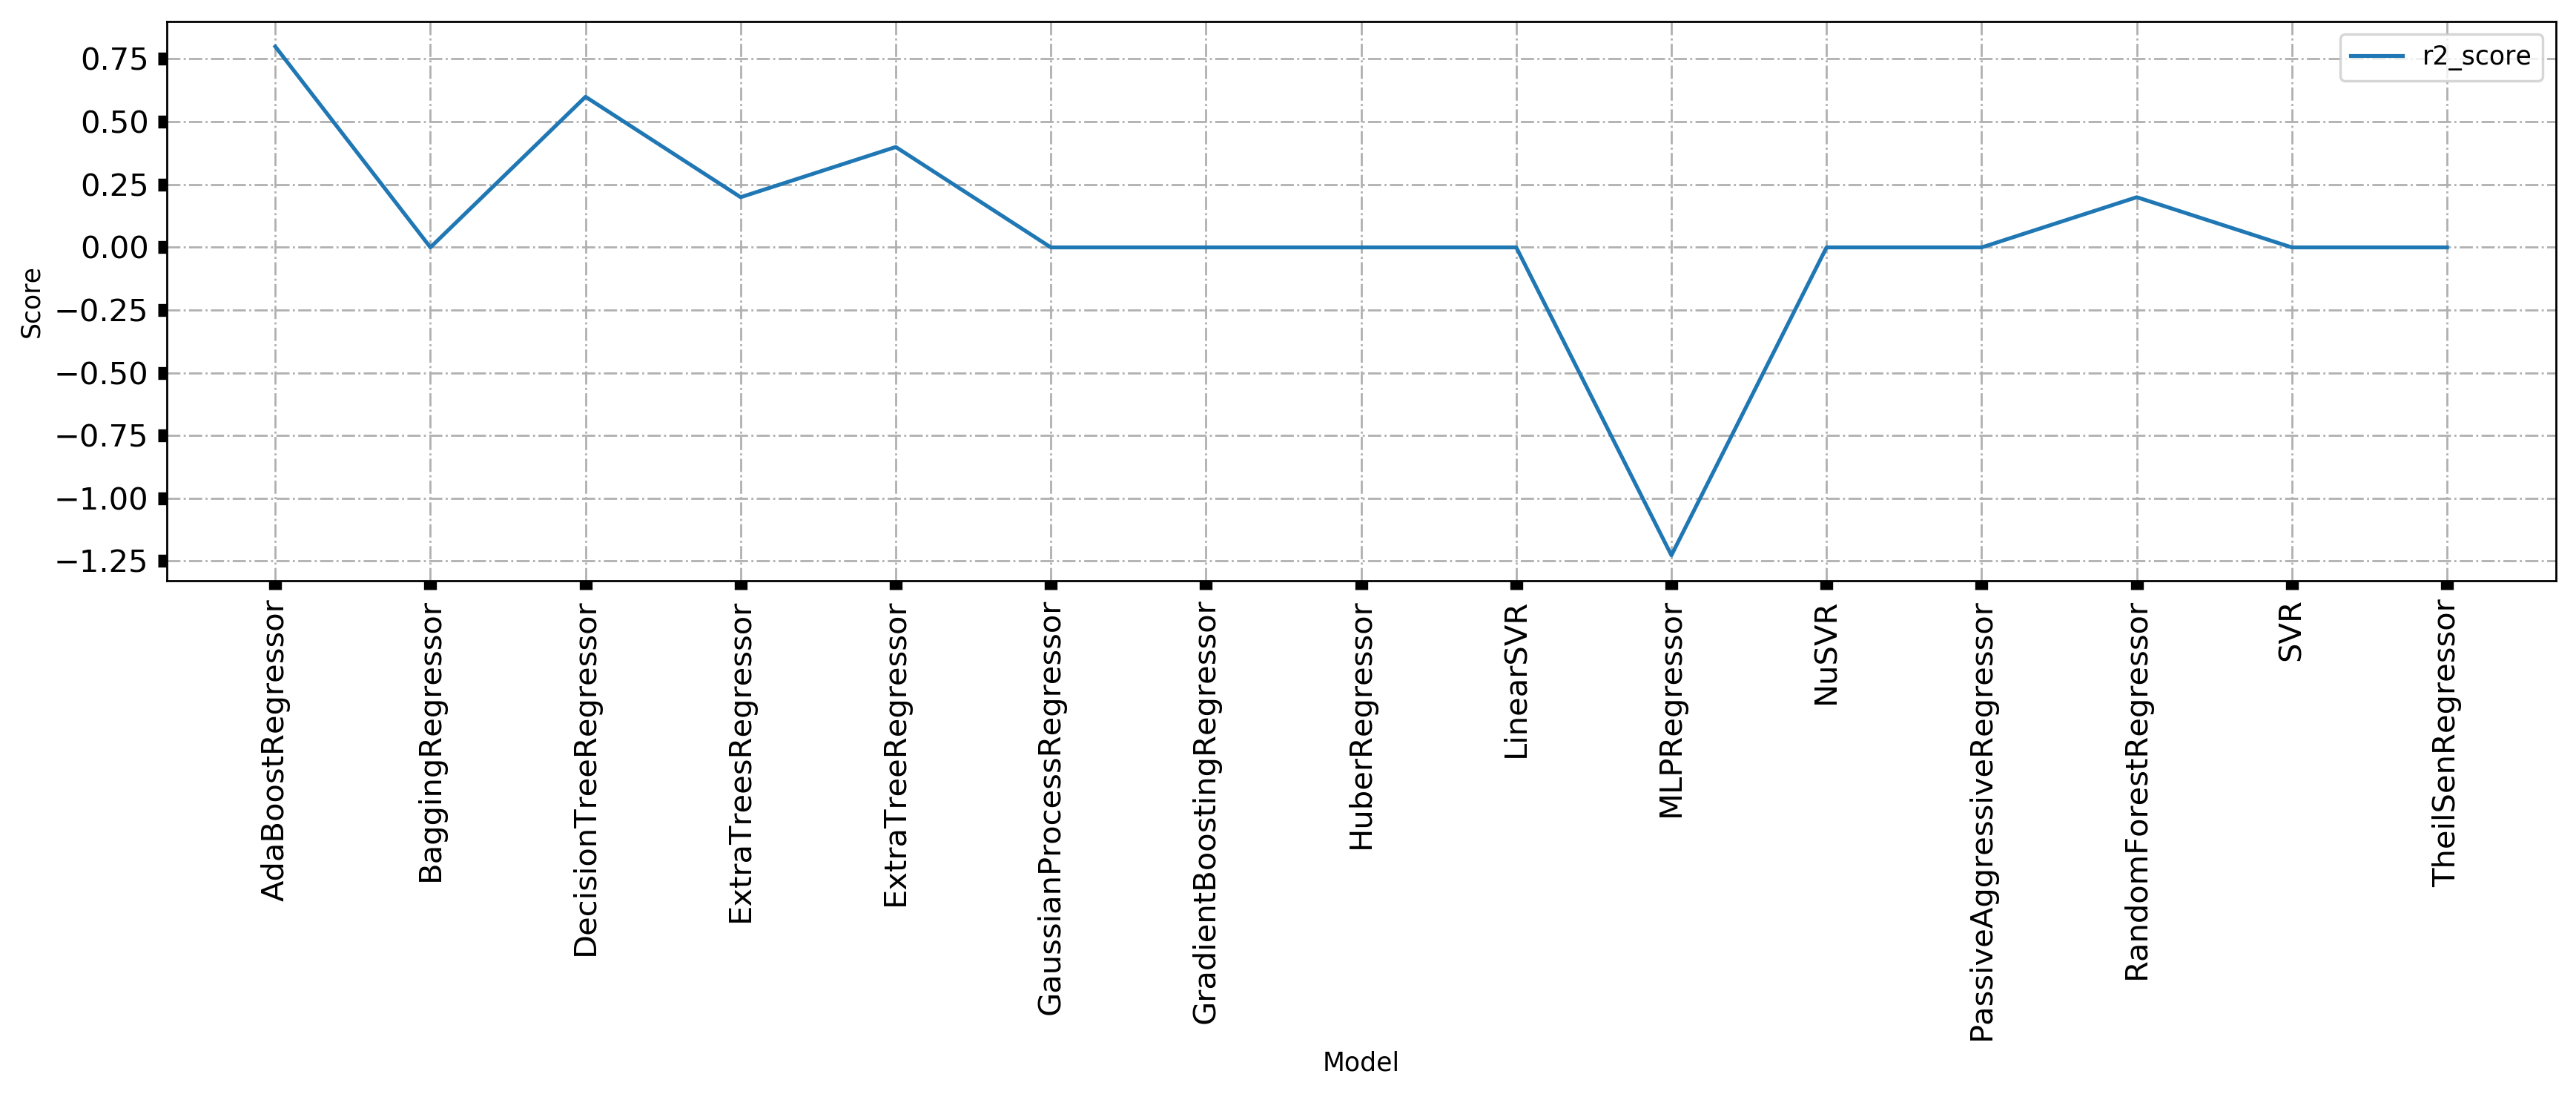

In [901]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure



labels= ['explained_variance_score', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'r2_score']

x = np.array(evaluation_pd['model'])
evaluation = evaluation[labels]




for n in range(len(labels)):
    figure(num=None, figsize=(14, 6), dpi=250)
    ax = plt.subplot(111)
    y = evaluation[labels[n]]

    plt.plot(x, y, label = labels[n])

    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.legend()
    plt.xlabel('Model')
    plt.ylabel('Score')   
    plt.xticks(rotation=90)
    ax.tick_params(labelsize='large', width=5)
    ax.grid(True, linestyle='-.')
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


labels= ['accuracy', 'precision', 'recall', 'f1']
x = np.array(evaluation['model'])

for item in evaluation_pd:
    evaluation = evaluation_pd[item]
    
    figure(num=None, figsize=(14, 6), dpi=250)
    ax = plt.subplot(111)
    
    for n in range(len(labels)):
        y = evaluation[labels[n]]
        
        plt.plot(x, y, label = labels[n])

    plt.title(item)
    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.legend()
    plt.xlabel('Model')
    plt.ylabel('Score')   
    plt.xticks(rotation=90)
    ax.tick_params(labelsize='large', width=5)
    ax.grid(True, linestyle='-.')
    plt.tight_layout()
    plt.show()
